# 9. Prädiktion der Arbeitslosenzahlen mit FFT und Poly-Regr.

In [103]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq
import scipy as sp

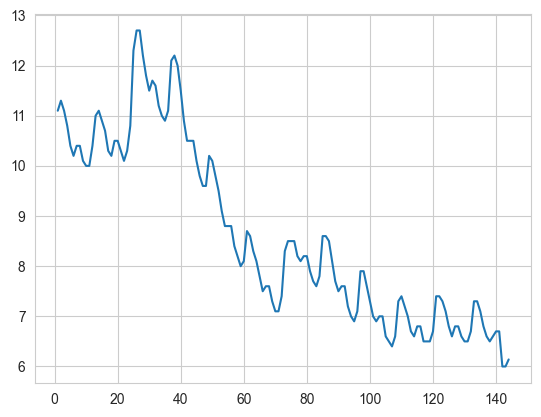

In [104]:
# Import der Daten
data = pd.read_csv('Arbeitslose.csv', sep=';')

plt.plot(data['Monate'],data['Arbeitslose'])

In [105]:
# Ausagbe im Diagramm
t = data['Monate']
t = t[60:]
arbeitslose = data['Arbeitslose']
arbeitslose = arbeitslose[60:]
arbeitslose


60     8.70
61     8.60
62     8.30
63     8.10
64     7.80
       ... 
139    6.70
140    6.70
141    6.00
142    6.00
143    6.14
Name: Arbeitslose, Length: 84, dtype: float64

### A. Polynomial Regression

In [106]:
# Fitting Polynomial Regression to the moving average data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#t = np.array(t)
#arbeitslose = np.array(arbeitslose)

X = np.array(t)
X = np.reshape(X,(-1,1))
X.shape


(84, 1)

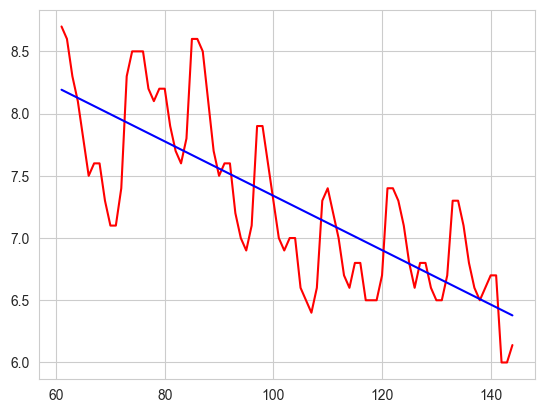

In [107]:
y = arbeitslose
y = np.reshape(y,(-1,1))

#y = arbeitslose.reshape(-1,1)
lin_reg.fit(X, y)

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=1)

X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
#
# Visualizing the Polymonial Regression results
y_poly = pol_reg.predict(poly_reg.fit_transform(X))
y_poly = y_poly.ravel()
plt.plot(X, y, color='red')
plt.plot(X, y_poly, color='blue')


### B. Extraktion des Seasonal Parts + Residuum
 y_diff = y - y_poly

84

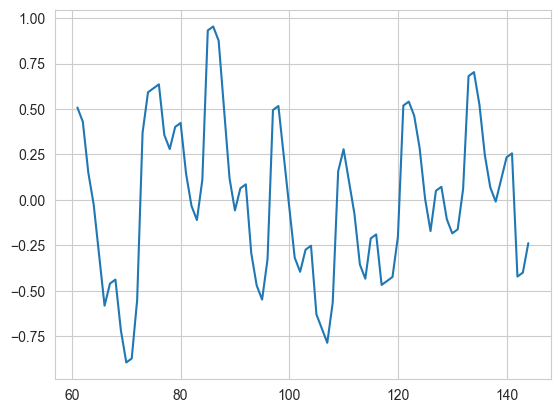

In [108]:
#Calculating the data - poly_data values
y_diff = arbeitslose - y_poly
plt.plot(t, y_diff)
#SAMPLE_RATE = 1/(t[2]-t[1])
#DURATION = y.size
#y_diff = y_diff.flatten()
len(y_diff)


In [109]:
y_diff
sum_yd=y_diff.sum()
sum_yd
y_diff=np.array(y_diff)

### C. Fourier-Trafo des Residuums

In [120]:
from scipy.fft import fft, fftfreq

yf = np.fft.fft(y_diff)


In [121]:
SAMPLE_RATE = 1
f = fftfreq(84, 1/SAMPLE_RATE)
f

array([ 0.        ,  0.01190476,  0.02380952,  0.03571429,  0.04761905,
        0.05952381,  0.07142857,  0.08333333,  0.0952381 ,  0.10714286,
        0.11904762,  0.13095238,  0.14285714,  0.1547619 ,  0.16666667,
        0.17857143,  0.19047619,  0.20238095,  0.21428571,  0.22619048,
        0.23809524,  0.25      ,  0.26190476,  0.27380952,  0.28571429,
        0.29761905,  0.30952381,  0.32142857,  0.33333333,  0.3452381 ,
        0.35714286,  0.36904762,  0.38095238,  0.39285714,  0.4047619 ,
        0.41666667,  0.42857143,  0.44047619,  0.45238095,  0.46428571,
        0.47619048,  0.48809524, -0.5       , -0.48809524, -0.47619048,
       -0.46428571, -0.45238095, -0.44047619, -0.42857143, -0.41666667,
       -0.4047619 , -0.39285714, -0.38095238, -0.36904762, -0.35714286,
       -0.3452381 , -0.33333333, -0.32142857, -0.30952381, -0.29761905,
       -0.28571429, -0.27380952, -0.26190476, -0.25      , -0.23809524,
       -0.22619048, -0.21428571, -0.20238095, -0.19047619, -0.17

In [122]:
import plotly.express as px
df = pd.DataFrame()
df['T'] = 1/f
df['yf'] = abs(yf)
fig = px.scatter(df, x="T", y="yf", title='Frequenzen in arbeitslosenzahl')
fig.show()

C:\Users\torsten.schmidt\AppData\Local\Temp\ipykernel_16176\3811035564.py:3: RuntimeWarning:

divide by zero encountered in divide



### D. Berechnung des prädizierten Residuums für einen längeren Zeitraum (in die Zukunft) durch Zusammensetzung der Elementaroszillationen A * cos(2 * Pi * f * t + Phi)

In [153]:
t_ext = np.arange(60,154, 1/SAMPLE_RATE)
t_ext




array([ 60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
        71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,
        82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,
        93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103.,
       104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114.,
       115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125.,
       126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
       137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
       148., 149., 150., 151., 152., 153.])

In [163]:
seasonal_predicted = np.zeros(t_ext.size) # eigentlich Seasonal Part + Residuum
for i in range(f.size):
    ampli = np.abs(yf[i]) /84 # amplitude
    phase = np.angle(yf[i]) # phase
    seasonal_predicted += ampli * np.cos(2 * np.pi * f[i] * (t_ext-60) + phase) # Elementaroszillationen
    
seasonal_predicted

array([ 0.50836975,  0.43021626,  0.15206277, -0.02609072, -0.3042442 ,
       -0.58239769, -0.46055118, -0.43870467, -0.71685816, -0.89501164,
       -0.87316513, -0.55131862,  0.37052789,  0.59237441,  0.61422092,
        0.63606743,  0.35791394,  0.27976045,  0.40160697,  0.42345348,
        0.14529999, -0.0328535 , -0.11100699,  0.11083953,  0.93268604,
        0.95453255,  0.87637906,  0.49822557,  0.12007209, -0.0580814 ,
        0.06376511,  0.08561162, -0.29254186, -0.47069535, -0.54884884,
       -0.32700233,  0.49484418,  0.5166907 ,  0.23853721, -0.03961628,
       -0.31776977, -0.39592326, -0.27407674, -0.25223023, -0.63038372,
       -0.70853721, -0.7866907 , -0.56484418,  0.15700233,  0.27884884,
        0.10069535, -0.07745814, -0.35561162, -0.43376511, -0.2119186 ,
       -0.19007209, -0.46822557, -0.44637906, -0.42453255, -0.20268604,
        0.51916047,  0.54100699,  0.4628535 ,  0.28470001,  0.00654652,
       -0.17160697,  0.05023955,  0.07208606, -0.10606743, -0.18

### E. Berechnung des polynomialen Anteils auch für t_ext, Zusammensetzung zu y_predict = y_poly + residuum_predicted und Darstellung im Diagramm

In [164]:
# Adding Polynomial Regression
X_ext = np.reshape(t_ext, (-1,1))

X_ext



array([[ 60.],
       [ 61.],
       [ 62.],
       [ 63.],
       [ 64.],
       [ 65.],
       [ 66.],
       [ 67.],
       [ 68.],
       [ 69.],
       [ 70.],
       [ 71.],
       [ 72.],
       [ 73.],
       [ 74.],
       [ 75.],
       [ 76.],
       [ 77.],
       [ 78.],
       [ 79.],
       [ 80.],
       [ 81.],
       [ 82.],
       [ 83.],
       [ 84.],
       [ 85.],
       [ 86.],
       [ 87.],
       [ 88.],
       [ 89.],
       [ 90.],
       [ 91.],
       [ 92.],
       [ 93.],
       [ 94.],
       [ 95.],
       [ 96.],
       [ 97.],
       [ 98.],
       [ 99.],
       [100.],
       [101.],
       [102.],
       [103.],
       [104.],
       [105.],
       [106.],
       [107.],
       [108.],
       [109.],
       [110.],
       [111.],
       [112.],
       [113.],
       [114.],
       [115.],
       [116.],
       [117.],
       [118.],
       [119.],
       [120.],
       [121.],
       [122.],
       [123.],
       [124.],
       [125.],
       [12

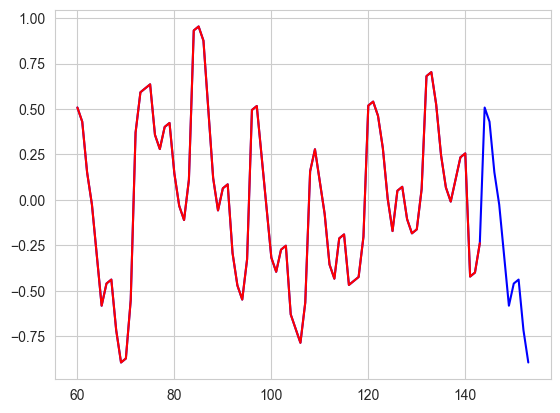

In [165]:
# Visualizing the Prediction results
y_poly = pol_reg.predict(poly_reg.fit_transform(X_ext))
y_poly = y_poly.ravel()
y_predict = seasonal_predicted + y_poly
plt.plot(X_ext, seasonal_predicted, color='blue')
plt.plot(t-1, y_diff, color='red')

In [166]:
t

60      61
61      62
62      63
63      64
64      65
      ... 
139    140
140    141
141    142
142    143
143    144
Name: Monate, Length: 84, dtype: int64